<a href="https://colab.research.google.com/github/Pujitha-Badam/Pattern-Sense-Classifying-Fabric-Patterns-using-Deep-Learning/blob/main/Fabric_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
import os

print("Checking path contents:")
print(os.listdir("/content/drive/My Drive/Fabric/raw_data"))


Checking path contents:
['chequered', 'striped', 'polka-dotted', 'paisley', 'zigzagged', 'plain']


In [5]:
DATASET_PATH = "/content/drive/My Drive/Fabric/raw_data"

BATCH_SIZE = 32
IMG_SIZE = (180, 180)

train_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 730 files belonging to 6 classes.
Using 584 files for training.
Found 730 files belonging to 6 classes.
Using 146 files for validation.
Classes: ['chequered', 'paisley', 'plain', 'polka-dotted', 'striped', 'zigzagged']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.1742 - loss: 2.1415 - val_accuracy: 0.2397 - val_loss: 1.7241
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.2263 - loss: 1.7299 - val_accuracy: 0.3151 - val_loss: 1.6519
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.3996 - loss: 1.5706 - val_accuracy: 0.4384 - val_loss: 1.4573
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4229 - loss: 1.4488 - val_accuracy: 0.3904 - val_loss: 1.4842
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5276 - loss: 1.2526 - val_accuracy: 0.5342 - val_loss: 1.3497
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6502 - loss: 0.9569 - val_accuracy: 0.4521 - val_loss: 1.5766
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6835 - loss: 0.9431 - val_accuracy: 0.4863 - val_loss: 1.4142
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7084 - loss: 0.7840 - val_accuracy: 0.5685 - val_loss

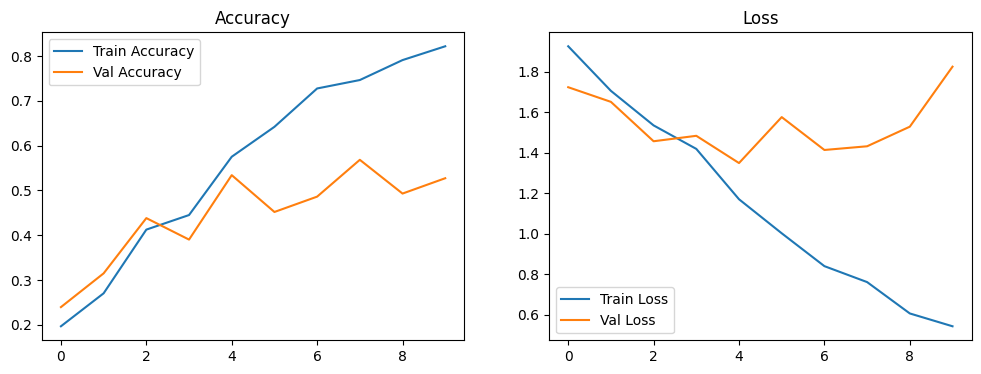

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [10]:
import PIL

image_path = "/content/drive/My Drive/Fabric/raw_data/striped/striped_0000119.jpg"
img = tf.keras.utils.load_img(image_path, target_size=IMG_SIZE)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100

print(f"Predicted: {predicted_class} ({confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted: plain (35.48%)
